<a href="https://colab.research.google.com/github/SriDharshana/Corn-disease-detection/blob/main/corndisease_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import numpy as np
import datetime
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [ ]:
import cv2
import numpy as np

In [ ]:
blight_train=os.path.join("/content/drive/MyDrive/projects/plantdiseaseds/traindata/Blight")
comman_rust_train=os.path.join("/content/drive/MyDrive/projects/plantdiseaseds/traindata/Common_Rust")
gray_leaf_spot_train=os.path.join("/content/drive/MyDrive/projects/plantdiseaseds/traindata/Gray_Leaf_Spot")
healthy_train=os.path.join("/content/drive/MyDrive/projects/plantdiseaseds/traindata/Healthy")
blight_validate=os.path.join("/content/drive/MyDrive/projects/plantdiseaseds/testdata/Blight")
comman_rust_validate=os.path.join("/content/drive/MyDrive/projects/plantdiseaseds/testdata/Common_Rust")
gray_leaf_spot_validate=os.path.join("/content/drive/MyDrive/projects/plantdiseaseds/testdata/Gray_Leaf_Spot")
healthy_validate=os.path.join("/content/drive/MyDrive/projects/plantdiseaseds/testdata/Healthy")

In [ ]:
print("Count of blight training  data",len(os.listdir(blight_train)))
print(" ")
print("Count of comman rust training  data",len(os.listdir(comman_rust_train)))
print(" ")
print("Count of gray leaf spot training  data",len(os.listdir(gray_leaf_spot_train)))
print(" ")
print("Count of healthy training  data",len(os.listdir(healthy_train)))
print(" ")
print("Count of blight validate  data",len(os.listdir(blight_validate)))
print(" ")
print("Count of comman training validate  data",len(os.listdir(comman_rust_validate)))
print(" ")
print("Count of gray leaf spot validate  data",len(os.listdir(gray_leaf_spot_validate)))
print(" ")
print("Count of healthy validate  data",len(os.listdir(healthy_validate)))
print(" ")

Count of blight training  data 300
 
Count of comman rust training  data 300
 
Count of gray leaf spot training  data 300
 
Count of healthy training  data 300
 
Count of blight validate  data 100
 
Count of comman training validate  data 100
 
Count of gray leaf spot validate  data 100
 
Count of healthy validate  data 100
 


In [ ]:
train_data=ImageDataGenerator(rescale=1/255)
training=train_data.flow_from_directory('/content/drive/MyDrive/projects/plantdiseaseds/traindata',classes=['Blight','Comman_Rust','Gray_Leaf_Spot','Healthy'],target_size=(256,256),batch_size=64,class_mode="categorical",shuffle=True)


Found 900 images belonging to 4 classes.


In [ ]:
valid_data=ImageDataGenerator(rescale=1/255)
validate=train_data.flow_from_directory('/content/drive/MyDrive/projects/plantdiseaseds/testdata',classes=['Blight','Comman_Rust','Gray_Leaf_Spot','Healthy'],target_size=(256,256),batch_size=64,class_mode="categorical",shuffle=True)

Found 300 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(2,2),padding="same",activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(3,3)))
#model.add(Conv2D(filters=256,kernel_size=(2,2),padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(3,3)))
model.add(Conv2D(filters=158,kernel_size=(2,2),padding="same",activation="relu"))
model.add(Conv2D(filters=158,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(3,3)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=1,activation="tanh"))

In [ ]:
model.summary()
model.compile(optimizer=tensorflow.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      1040      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 256)       37120     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 256)      0         
 2D)                                                    

In [ ]:
model.fit_generator(training, epochs=2)

<ipython-input-12-8338bc7e4166>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training, epochs=2)


Epoch 1/2
15/15 [==============================] - 439s 28s/step - loss: 0.7608 - accuracy: 0.6106
Epoch 2/2
15/15 [==============================] - 7s 450ms/step - loss: 0.5728 - accuracy: 0.7500


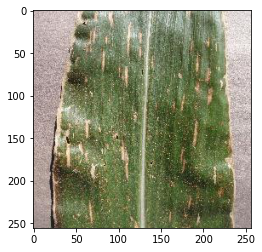

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img("/content/drive/MyDrive/projects/plantdiseaseds/traindata/Gray_Leaf_Spot/Copy of Corn_Gray_Spot (112).JPG",target_size=(256,256))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)




In [ ]:
from keras.models import Model

In [ ]:
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 63ms/step


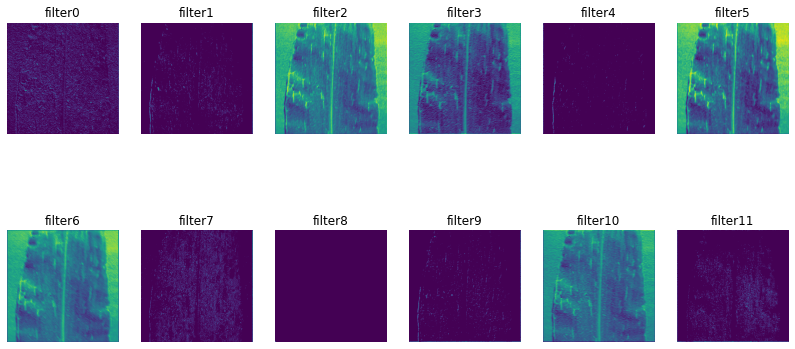

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 6
rows = 2
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

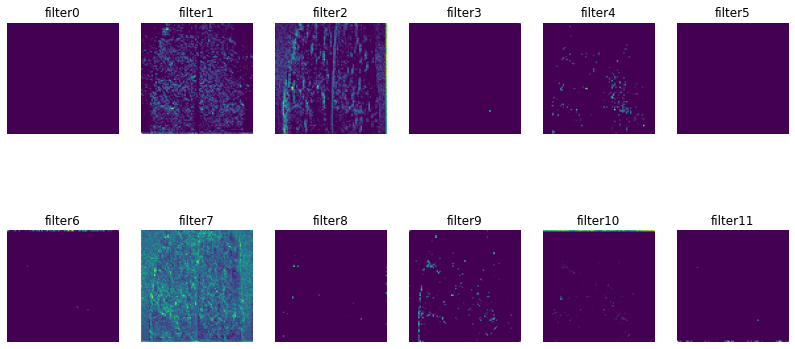

In [ ]:

import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 6
rows = 2
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

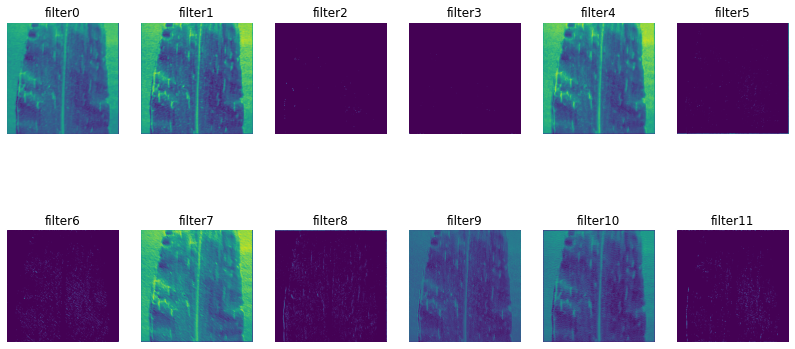

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 6
rows = 2
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

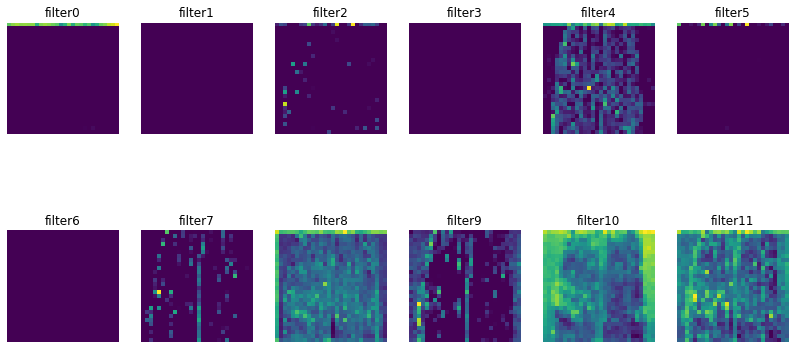

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 6
rows = 2
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

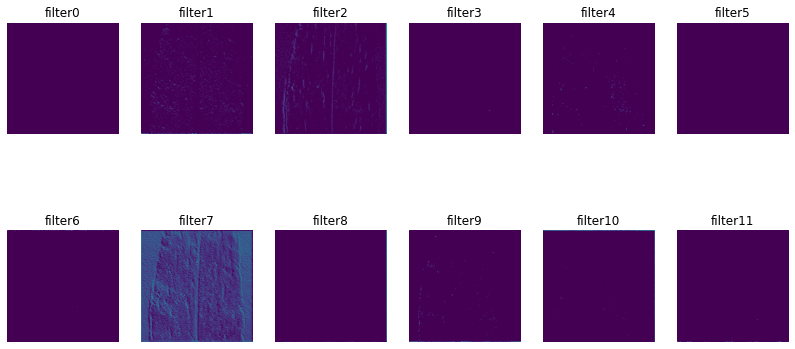

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 6
rows = 2
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

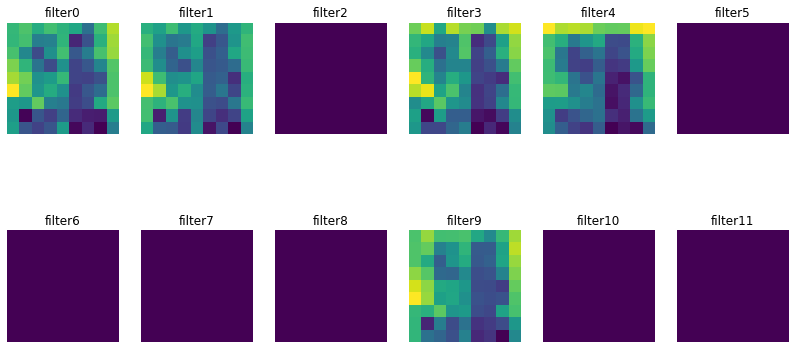

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 6
rows = 2
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

In [ ]:
model.evaluate(validate)

5/5 [==============================] - 171s 43s/step - loss: 0.5672 - accuracy: 0.7500


[0.5671989917755127, 0.75]

In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import load_model
model = load_model("model.h5")

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/projects/plantdiseaseds/testdata/Common_Rust/Copy of Corn_Common_Rust (307).JPG', target_size=(256, 256))


In [ ]:
test_image = image.img_to_array(test_image)


In [ ]:
test_image = np.expand_dims(test_image, axis=0)


In [ ]:
prediction = model.predict(test_image)


1/1 [==============================] - 0s 73ms/step


In [ ]:
training.class_indices

{'Blight': 0, 'Comman_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

In [ ]:
print(prediction)

[[1.]]


In [ ]:
model.save('corndisease_detect_model.h5')